# Использование готовой предобученной модели по определению качества воды 

В настоящее время не только государства, но и крупнейшие промышленные компании все чаще включают в свои стратегии развития положения о контроле за состоянием окружающей среды. Существенно упростить их реализацию позволяет различные информационные продукты. Которые в первую очередь повышают оперативность реагирования на возникающие угрозы, упрощает анализ тенденций изменения окружающей среды и выполнения профилактических мероприятий и, как результат, снижается риск получения штрафных санкций за загрязнение экологии.

В данной работе будет рассмотрена предобученная модель по контролю качества воды. Модель вполне может бытть использована для реализации мониторнга водных ресурсов используемых для крупных добычных предприятий, предприятий энергетического комплекса, то есть ттам где в технологическом процессе используются водные ресурсы.  Данная модель расположена на открытом ресурсе [Hugging Face](https://huggingface.co/DarkNeuronAI/darkneuron-hydrasense-v1/blob/main/README.md?code=true).

# Описание модели 
# 💧 HydraSense — модель классификации качества воды с точки зрения возможности ее употребления для питья (v1.0)

Простая модель прогнозирования качества воды на основе **Random Forest + StandardScaler**, разработанная **DarkNeuronAI**.

Она классифицирует воду как **Питьевая (1)** или **Непитьевая (0)** на основе химических и физических характеристик — идеально подходит для простых задач табличной классификации.


## 🚀 Функции
- Быстрый и эффективный — легко работает на стандартных ноутбуках
- Обучен на реальных наборах данных о качестве воды
- Прогнозирует пригодность к питью по таким параметрам, как **pH, жёсткость, содержание твёрдых веществ, хлораминов, сульфатов, электропроводность, органический углерод, тригалометаны, мутность**
- Использует **конвейер** для автоматического масштабирования и предварительной обработки входных данных
- Простота использования и интеграции


## 🚀 Обзор модели
- **Алгоритм:** Классификатор случайного леса
- **Предварительная обработка:** StandardScaler (автоматическое масштабирование признаков)
- **Цель:** Предсказать, является ли вода безопасной для питья (питьевая) или небезопасной (непитьевая)
- **Производительность:** Точная классификация на реальных наборах данных



## 🏷️ Описание результатов прогнозов (двоичные)
- **0:** Непригодно для питья (небезопасно для питья)
- **1:** Пригодно для питья (безопасно для питья)





# 🗂️ Данные для проверки модели

Так же для данной модели сформирован dataset содержащий параметры для данной модели:
* ph - pH 
* Hardness - жесткость 
* Solids - содержание твердых веществ 
* Chloramines - хлораминов
* Sulfate - сульфатов
* Conductivity - электропроводимость 
* Organic_carbon - органический углерод
* Trihalomethanes - тригалометаны 
* Turbidity - тригалометаны
* Potability - пригодност для питья

# Этапы 
* Исследовавние структуры данных 
* Преобразование данных 
* Очистка данных 
* Исследование зависимостей в данных 
* Тестироавние модели

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

!pip3 install huggingface-hub
from huggingface_hub import hf_hub_download
import joblib
%matplotlib inline 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [341]:
global_df = pd.read_csv('water_potab.csv', sep=',')

# работаем с копией данных 
wdf = global_df.copy()

In [342]:
display(wdf.head(2))
display(wdf.tail(2))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9826,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
9827,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [343]:
wdf.info()
wdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9828 entries, 0 to 9827
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               8353 non-null   float64
 1   Hardness         9828 non-null   float64
 2   Solids           9828 non-null   float64
 3   Chloramines      9828 non-null   float64
 4   Sulfate          7485 non-null   float64
 5   Conductivity     9828 non-null   float64
 6   Organic_carbon   9828 non-null   float64
 7   Trihalomethanes  9342 non-null   float64
 8   Turbidity        9828 non-null   float64
 9   Potability       9828 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 767.9 KB


ph                 1475
Hardness              0
Solids                0
Chloramines           0
Sulfate            2343
Conductivity          0
Organic_carbon        0
Trihalomethanes     486
Turbidity             0
Potability            0
dtype: int64

In [344]:
wdf.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,8353.000000,9828.000000,9828.000000,9828.000000,7485.000000,9828.000000,9828.000000,9342.000000,9828.000000,9828.00000
mean,7.081075,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.39011
std,1.593855,32.876415,8767.678489,1.582924,41.411306,80.815839,3.307825,16.173277,0.780303,0.48780
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.00000
25%,6.093092,176.850538,15666.690300,6.127421,307.694522,365.734414,12.065801,55.835966,3.439711,0.00000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.00000
75%,8.062066,216.667456,27332.762125,8.114887,359.951766,481.792305,16.557652,77.339918,4.500320,1.00000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.00000


In [345]:
print(wdf.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


# Преобразование данных 

Исходя из анализа данных в данных довольно много пропусков 



In [346]:
cols_null_percent = wdf.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Sulfate            23.840049
ph                 15.008140
Trihalomethanes     4.945055
dtype: float64

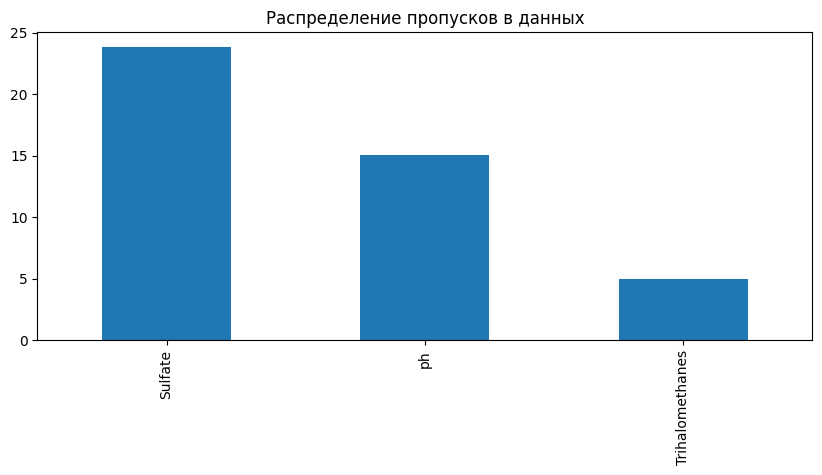

In [347]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);


Перед измененим данных посомрим на распределение в графах с 0

array([[<Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'Trihalomethanes'}>, <Axes: >]],
      dtype=object)

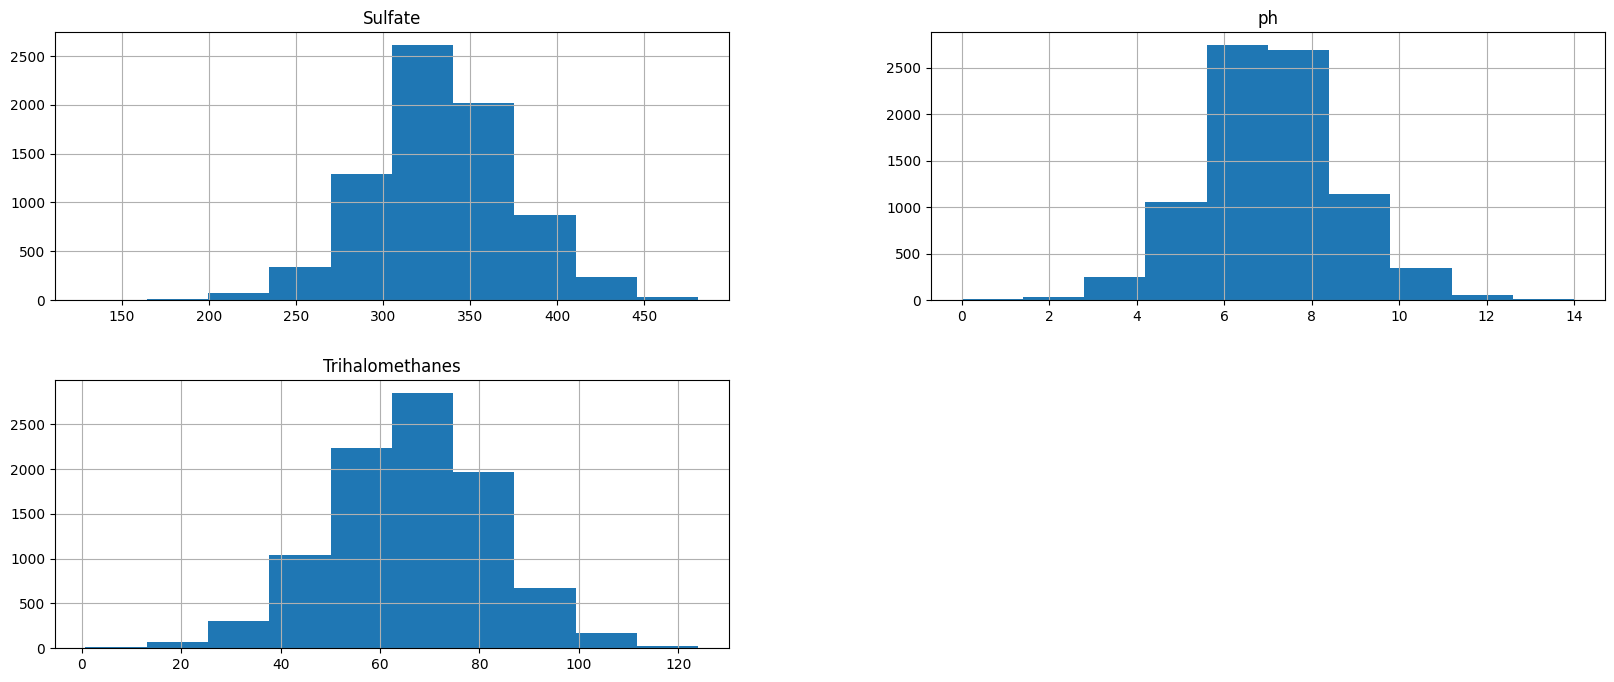

In [348]:
wdf[cols_with_null.index].hist(figsize=(20, 8))

Процены пропусков менее 30% + распределение похоже на нормальное -> оставляем столбцы и замеяем на среднее  медиану

In [349]:
wdf_1 = wdf.copy()

#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Sulfate': wdf_1['Sulfate'].median(),
    'ph': wdf_1['ph'].median(),
    'Trihalomethanes': wdf_1['Trihalomethanes'].median(),
}

#заполняем пропуски в соответствии с заявленным словарем
wdf_1 = wdf_1.fillna(values)
#выводим результирующую долю пропусков
wdf_1.isnull().mean()

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

строим графки после замены 

array([[<Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'Trihalomethanes'}>, <Axes: >]],
      dtype=object)

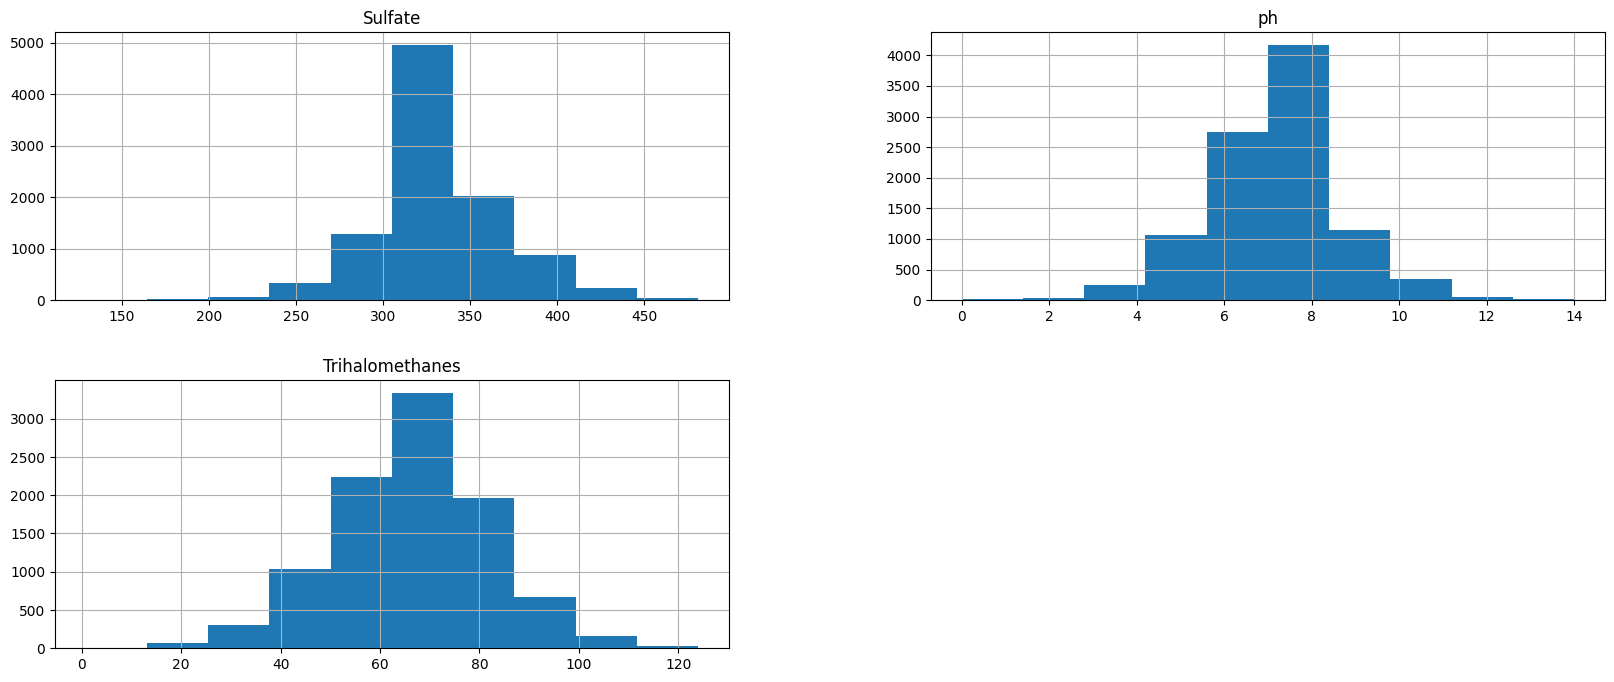

In [350]:
wdf_1[cols_with_null.index].hist(figsize=(20, 8))

Проверим выбросы 

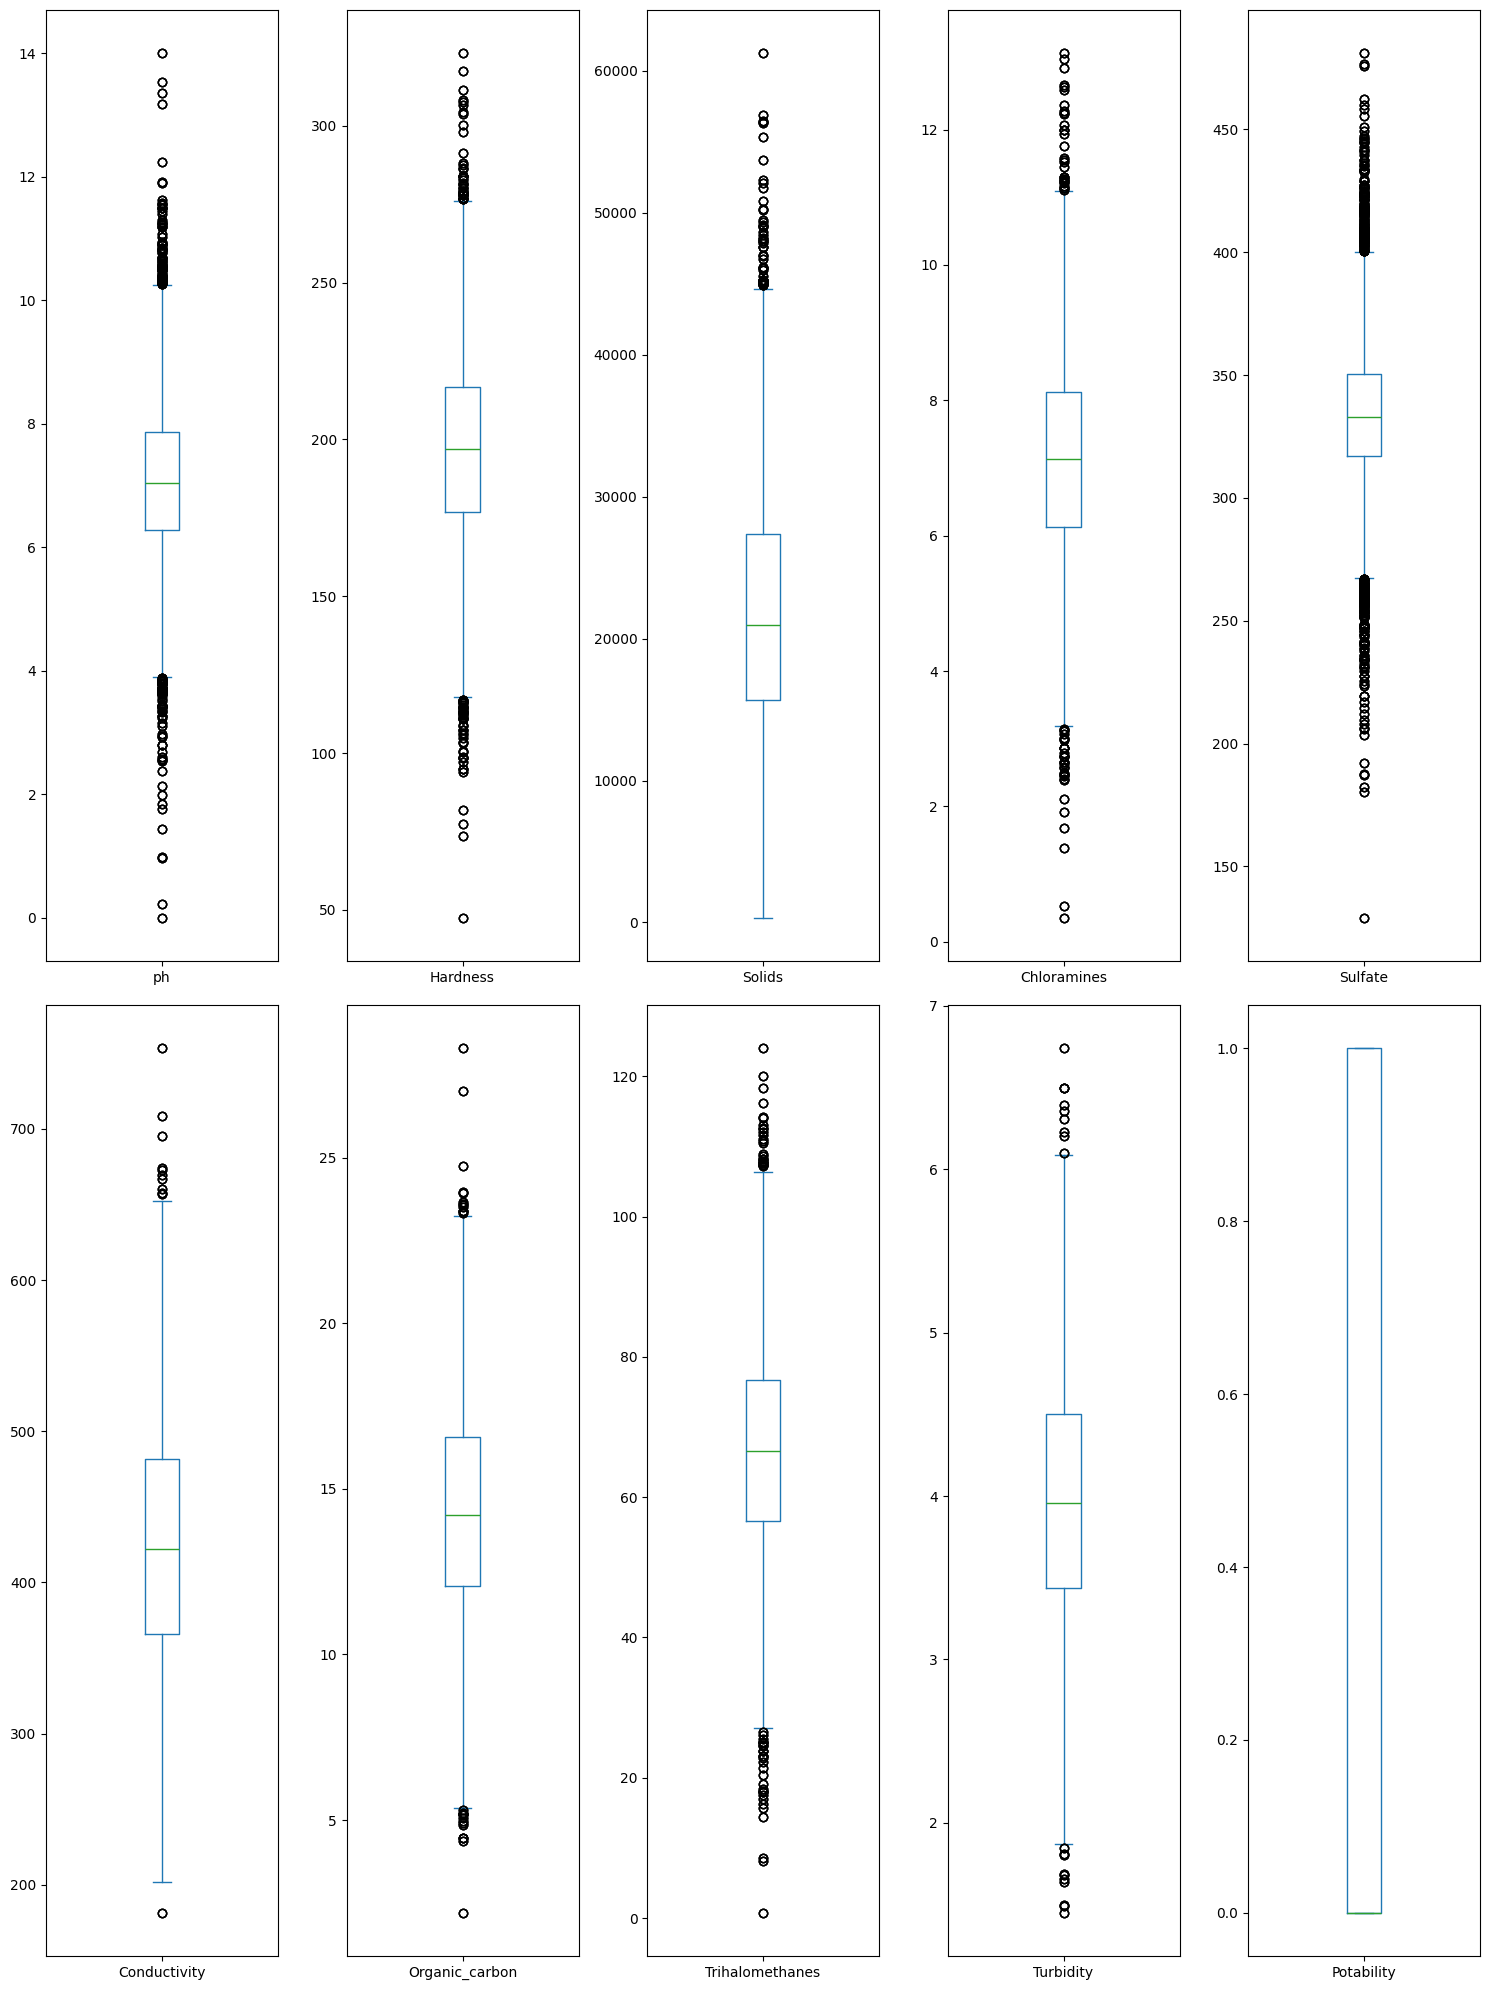

In [351]:
wdf_1.plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 20), sharex=False, sharey=False)

plt.tight_layout()


<Axes: ylabel='Frequency'>

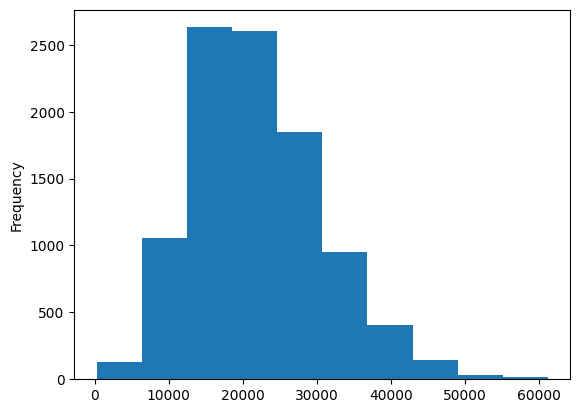

In [352]:
wdf_1.Solids.plot(kind='hist')

In [353]:
wdf_2 = wdf_1.copy()
dbscan = DBSCAN(eps=500)
wdf_2['Solids_dbscan_pred_1'] = dbscan.fit_predict(wdf_2['Solids'].values.reshape(-1, 1))
wdf_2[wdf_2.Solids_dbscan_pred_1 < 0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Solids_dbscan_pred_1
1068,3.344589,156.479927,55334.70280,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,0,-1
2602,7.036752,159.399398,61227.19601,3.713594,312.976254,377.067972,17.246698,82.197233,3.860807,0,-1
3130,8.140344,153.748170,50793.89892,7.843498,306.218950,423.455906,14.322019,65.076610,4.362792,1,-1
3162,9.079715,222.042631,53735.89919,6.894915,254.040977,382.896166,12.704887,101.615346,4.551724,1,-1
4344,3.344589,156.479927,55334.70280,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,0,-1
5878,7.036752,159.399398,61227.19601,3.713594,312.976254,377.067972,17.246698,82.197233,3.860807,0,-1
6406,8.140344,153.748170,50793.89892,7.843498,306.218950,423.455906,14.322019,65.076610,4.362792,1,-1
6438,9.079715,222.042631,53735.89919,6.894915,254.040977,382.896166,12.704887,101.615346,4.551724,1,-1
7620,3.344589,156.479927,55334.70280,8.530102,371.147770,485.631148,16.980610,69.622490,2.575141,0,-1
9154,7.036752,159.399398,61227.19601,3.713594,312.976254,377.067972,17.246698,82.197233,3.860807,0,-1


# Исследование зависимостей

In [354]:
#список неинформативных признаков

wdf_5 = wdf_1.copy()

low_information_cols = []

#цикл по всем столбцам
for col in wdf_5.columns:
    #наибольшая относительная частота в признаке
    top_freq = wdf_5[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = wdf_5[col].nunique() / wdf_5[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

if not low_information_cols:
    print(f'Неинформативных столбцов не найдено')

Неинформативных столбцов не найдено


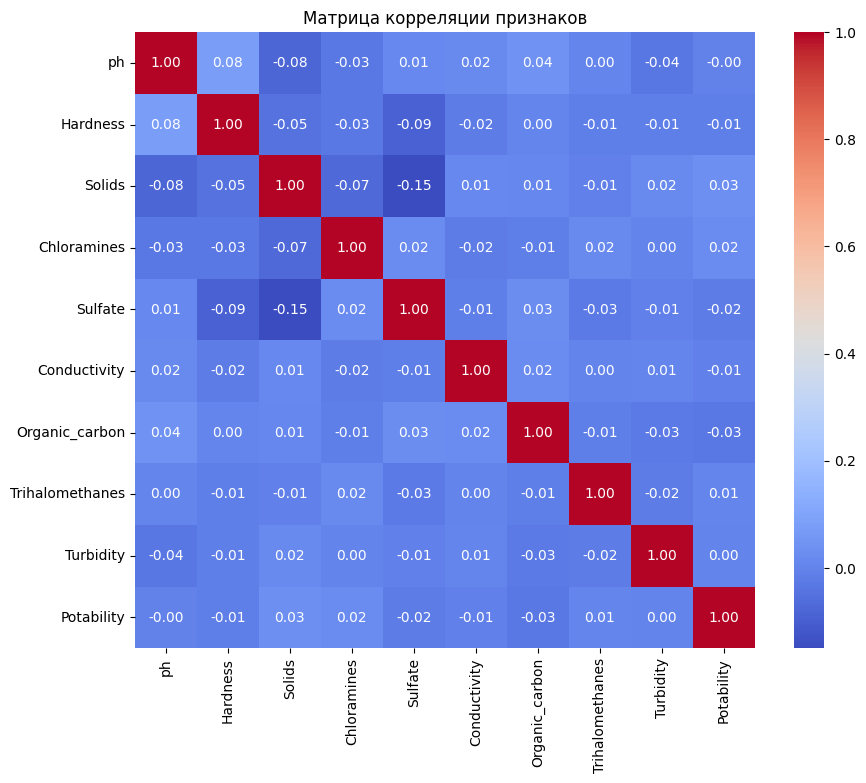


Корреляция с признаком  Пригодность для питья (Potability):
Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006887
Turbidity          0.001581
ph                -0.003140
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020476
Organic_carbon    -0.030001
Name: Potability, dtype: float64


In [355]:
# Матрица корреляции
plt.figure(figsize=(10, 8))
# 'Outcome' - целевой признак (0/1)
correlation_matrix = wdf_5.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции признаков')
plt.show()

# Вывод корреляции с целевым признаком
print("\nКорреляция с признаком  Пригодность для питья (Potability):")
print(correlation_matrix['Potability'].sort_values(ascending=False))

Корреляции между признаками не найдено

In [356]:
wdf_fin = wdf_5.copy()

# Тестирование модели

In [357]:
# Download and load the trained pipeline
pipeline_path = hf_hub_download("DarkNeuron-AI/darkneuron-hydrasense-v1", "water_potability_model.pkl")
model = joblib.load(pipeline_path)
# Example water sample

sample_df = wdf_fin.copy()
sample_df.drop(['Potability'], axis=1, inplace=True)

y0 = wdf_fin['Potability']


# Predict potability
prediction = model.predict(sample_df)

#print("Prediction:", "💧 Potable" if prediction[0] == 1 else "⚠️ Not Potable")

In [358]:
# Расчет Accuracy
accuracy = accuracy_score(y0, prediction)
print(f"Точность (Accuracy): {accuracy:.2f}")

Точность (Accuracy): 0.93


In [359]:
print(classification_report(y0, prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5994
           1       0.95      0.88      0.91      3834

    accuracy                           0.93      9828
   macro avg       0.94      0.93      0.93      9828
weighted avg       0.94      0.93      0.93      9828



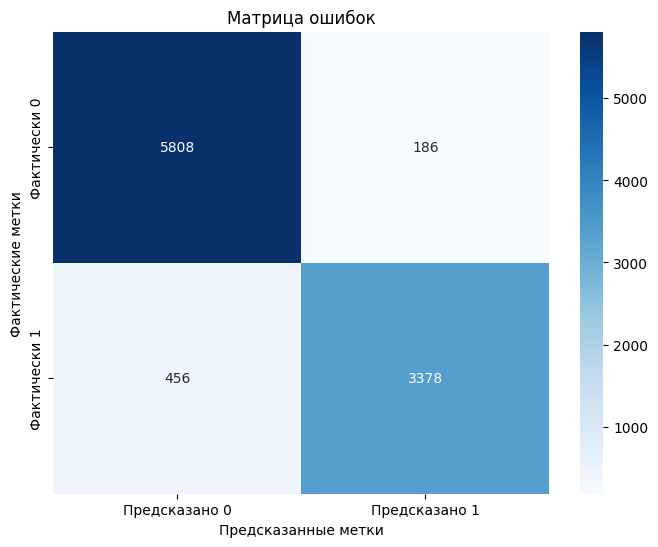

In [360]:
conf_matrix = confusion_matrix(y0, prediction)

# Визуализация с использованием Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Предсказано 0', 'Предсказано 1'], 
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.xlabel('Предсказанные метки')
plt.ylabel('Фактические метки')
plt.title('Матрица ошибок')
plt.show()